In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# data
df = pd.read_csv("BRCA1_HUMAN_Findlay_2018.csv")
print(df)


      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  
0                 0  
1                 0

In [3]:
mutant = df.mutant
DMS = df.DMS_score
DMS_bin=df.DMS_score_bin

In [4]:
# weitere Zeile mit 'position'
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

df['position']=df['mutant'].apply(get_number_from_text)
print(df)
          

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin position  
0                 0        1  
1

In [5]:
#Zeile mit neuer Aminosäure
test1=df.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
df["new_aa"]=test1[1]
print(df)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin position new_aa  
0                 0      

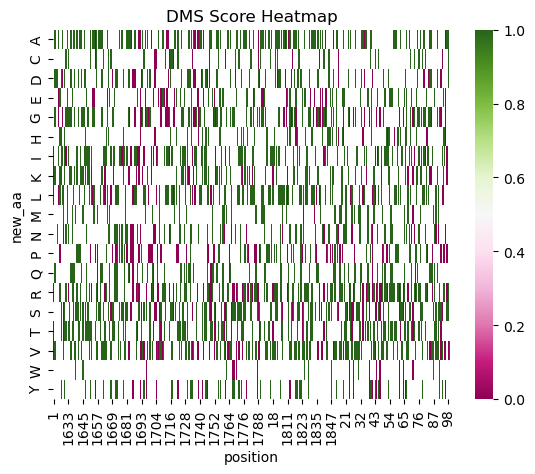

In [6]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = df.pivot_table(index='new_aa', columns='position', values='DMS_score_bin', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='PiYG')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Score Heatmap')
plt.show()

In [7]:
# höchster DMS_score, bei dem bin score = 0
bin_filter= df['DMS_score_bin'] == 0
filtered_df = df[bin_filter]

max_DMS = filtered_df['DMS_score'].max()
print(max_DMS)

-1.009539446


In [8]:
df_filtered = df[df['DMS_score_bin'] == 0]

In [9]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Helices

helices = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]

helices_df = df.loc[df['position'].astype(str).isin(helices)]
print(helices_df)




      mutant                                   mutated_sequence  DMS_score  \
41       V8G  MDLSALRGEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.312289   
42       V8F  MDLSALRFEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.569227   
43       V8D  MDLSALRDEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.121676   
44       V8A  MDLSALRAEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.223406   
45       V8I  MDLSALRIEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.560919   
...      ...                                                ...        ...   
1768  L1844H  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.312583   
1769  L1844I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.268220   
1770  L1844F  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.170768   
1771  L1844V  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.196109   
1772  L1844P  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.232682   

      DMS_score_bin position new_aa  
41                1      

In [10]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Helices (bin=0)
helices_df_bin0 = helices_df.loc[helices_df['DMS_score_bin'] == 0].copy()
helices_df_bin0

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,new_aa
43,V8D,MDLSALRDEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.121676,0,8,D
59,V11L,MDLSALRVEELQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.168017,0,11,L
60,V11G,MDLSALRVEEGQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.474497,0,11,G
61,V11E,MDLSALRVEEEQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.204883,0,11,E
68,Q12P,MDLSALRVEEVPNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.184755,0,12,P
...,...,...,...,...,...,...
1756,V1842G,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.922434,0,1842,G
1759,V1842A,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.494811,0,1842,A
1760,V1842E,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.026893,0,1842,E
1761,A1843E,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.819921,0,1843,E


In [11]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Strand

strands = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]


strands_df = df.loc[df['position'].astype(str).isin(strands)]
print(strands_df)

      mutant                                   mutated_sequence  DMS_score  \
683   M1650R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.292724   
684   M1650L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.117123   
685   M1650K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.081677   
686   M1650I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.093431   
687   M1650T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.210381   
...      ...                                                ...        ...   
1575  V1810M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.477758   
1576  V1810L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.121348   
1577  V1810G  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -3.373881   
1578  V1810E  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.563641   
1579  V1810A  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.036261   

      DMS_score_bin position new_aa  
683               1     1

In [12]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Strands (bin=0)
strands_df_bin0 = strands_df.loc[strands_df['DMS_score_bin'] == 0].copy()
print(strands_df_bin0)


      mutant                                   mutated_sequence  DMS_score  \
692   S1651P  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.478649   
695   M1652R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.890501   
700   M1652K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.532355   
702   V1653E  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.503698   
704   V1653L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.797284   
709   V1654E  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.067964   
832   T1677I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.013695   
870   T1684N  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.250974   
872   T1684S  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.305009   
873   T1684P  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.468392   
874   T1684I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.973015   
875   T1685N  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF... 

In [13]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei coils 
df['position'] = df['position'].astype(int)

coils = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) + list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865))
coils_df = df.loc[df['position'].isin(coils)]
print(coils_df)




      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  position new_aa  
0                 0     

In [14]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Coils  (bin=0)
coils_df_bin0 = coils_df.loc[coils_df['DMS_score_bin'] == 0].copy()
coils_df_bin0

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,new_aa
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,I
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,V
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,T
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,R
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,L
...,...,...,...,...,...,...
1782,Q1846P,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.966089,0,1846,P
1791,Q1848P,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.749799,0,1848,P
1797,E1849A,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.184978,0,1849,A
1801,E1849V,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.009539,0,1849,V


In [15]:
# Test, ob ich dumm bin und sich Helices/Strands/Coils überschneiden. FAzIT: NEIN
set1 = set(helices)
set2 = set(strands)
set3 = set(coils)

common_elements = set1.intersection(set2, set3)

common_elements_list = list(common_elements)
common_elements_list

[]

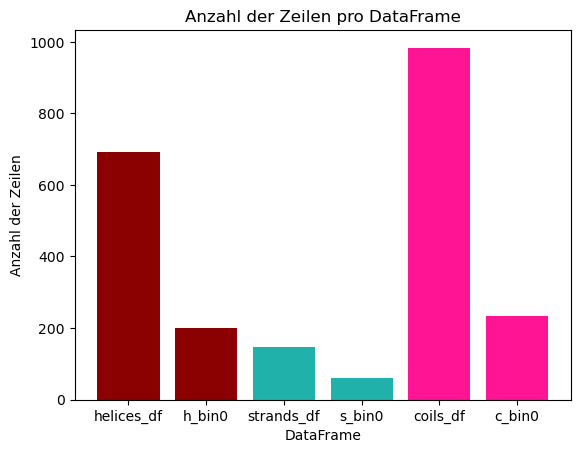

Verhältnis h_bin0 zu helices: 29.00%
Verhältnis strands_bin0 zu strands: 40.54%
Verhältnis coils_bin0 zu coils: 23.88%


In [16]:
#plot Vergleich secondary structures


# Anzahl der Zeilen in jedem DataFrame
df_counts = [len(helices_df),len(helices_df_bin0), len(strands_df),len(strands_df_bin0), len(coils_df),len(coils_df_bin0)]

# DataFrame-Namen
df_names = ['helices_df',"h_bin0", 'strands_df',"s_bin0",'coils_df',"c_bin0"]
colors = ['darkred', 'darkred', 'lightseagreen', 'lightseagreen', 'deeppink', 'deeppink']

# Erstelle das Balkendiagramm
plt.bar(df_names, df_counts,color=colors)



# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('DataFrame')
plt.ylabel('Anzahl der Zeilen')
plt.title('Anzahl der Zeilen pro DataFrame')

# Zeige das Diagramm an
plt.show()


#Verältnisse der Sekundärstrukturen und ihren bin0 scores

# Liste der DataFrames
dataframes = [helices_df, helices_df_bin0, strands_df, strands_df_bin0, coils_df, coils_df_bin0]

# DataFrame-Namen
df_names = ['helices', 'h_bin0', 'strands', 'strands_bin0', 'coils', 'coils_bin0']

# Berechnung des Verhältnisses der Anzahl der Zeilen für jedes Paar in Prozent
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)

# Ausgabe der Verhältnisse
for i, ratio in enumerate(ratios):
    print(f"Verhältnis {df_names[i*2+1]} zu {df_names[i*2]}: {ratio:.2f}%")

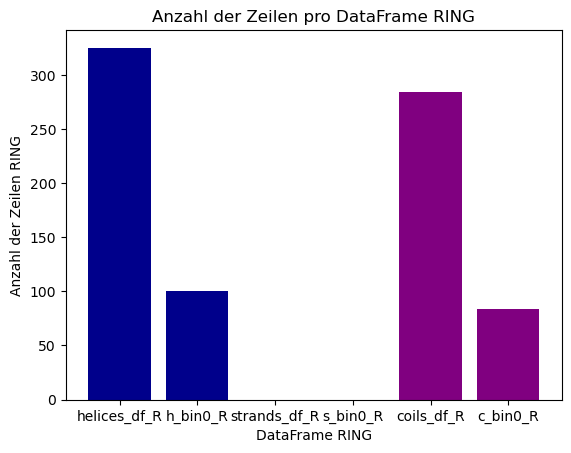

Verhältnis h_bin0_R zu helices_R: 30.77%
Verhältnis coils_bin0_R zu coils_R: 29.58%


In [17]:
#nochmal alles (secondary structures), aber nur RING-Domäne (AS 1-101)

#Helices in RING
helices_RING = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97"]
helices_df_RING = df.loc[df['position'].astype(str).isin(helices_RING)]
helices_df_RING_bin0 = helices_df_RING.loc[helices_df_RING['DMS_score_bin'] == 0].copy()
#strands in RING (gibts nicht)
#coils in RING
df['position'] = df['position'].astype(int)
coils_RING = list(range(1, 8)) + list(range(22, 35)) + list(range(37, 45))+ list(range(55, 67)) + list(range(69, 77)) + list(range(98, 102)) 
coils_df_RING = df.loc[df['position'].isin(coils_RING)]
coils_df_RING_bin0 = coils_df_RING.loc[coils_df_RING['DMS_score_bin'] == 0].copy()

#Plot mit RING
# Anzahl der Zeilen in jedem DataFrame
df_counts = [len(helices_df_RING),len(helices_df_RING_bin0),0,0, len(coils_df_RING),len(coils_df_RING_bin0)]
# DataFrame-Namen
df_names = ['helices_df_R',"h_bin0_R", 'strands_df_R',"s_bin0_R",'coils_df_R',"c_bin0_R"]
colors = ['darkblue', 'darkblue', 'red', 'red', 'purple', 'purple']
# Erstelle das Balkendiagramm
plt.bar(df_names, df_counts,color=colors)
# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('DataFrame RING')
plt.ylabel('Anzahl der Zeilen RING')
plt.title('Anzahl der Zeilen pro DataFrame RING')
plt.show()



#Verältnisse der Sekundärstrukturen und ihren bin0 scores (RING)

# Liste der DataFrames
dataframes = [helices_df_RING, helices_df_RING_bin0, coils_df_RING, coils_df_RING_bin0]

# DataFrame-Namen
df_names = ['helices_R', 'h_bin0_R', 'coils_R', 'coils_bin0_R']

# Berechnung des Verhältnisses der Anzahl der Zeilen für jedes Paar in Prozent
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)

# Ausgabe der Verhältnisse
for i, ratio in enumerate(ratios):
    print(f"Verhältnis {df_names[i*2+1]} zu {df_names[i*2]}: {ratio:.2f}%")





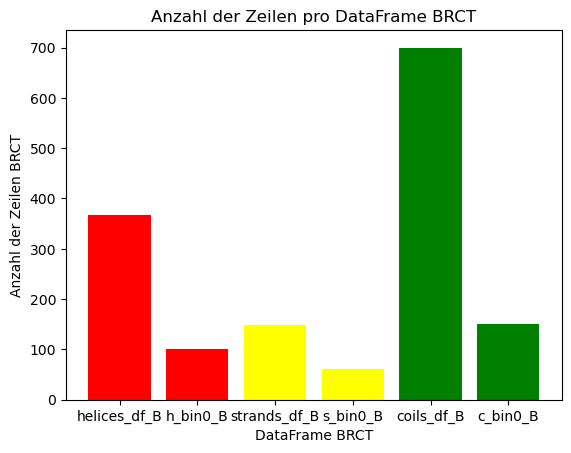

Verhältnis h_bin0_B zu helices_B: 27.45%
Verhältnis s_bin0_B zu strands_B: 40.54%
Verhältnis coils_bin0_B zu coils_B: 21.57%


In [18]:
#nochmal alles (secondary structures), aber nur BRCT-Domäne (AS 1631-ENDE)

#Helices in BRCT
helices_BRCT = ["1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]
helices_df_BRCT = df.loc[df['position'].astype(str).isin(helices_BRCT)]
helices_df_BRCT_bin0 = helices_df_BRCT.loc[helices_df_BRCT['DMS_score_bin'] == 0].copy()
#strands in BRCT
strands_BRCT = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]
strands_df_BRCT = df.loc[df['position'].astype(str).isin(strands_BRCT)]
strands_df_BRCT_bin0 = strands_df_BRCT.loc[strands_df_BRCT['DMS_score_bin'] == 0].copy()

#coils in BRCT
df['position'] = df['position'].astype(int)
coils_BRCT = list(range(1631, 1651))+ list(range(1656, 1660)) + list(range(1673, 1676)) + list(range(1679, 1686)) + list(range(1691, 1702)) + list(range(1710, 1715))+ list(range(1727, 1736))+ list(range(1738, 1753))+ list(range(1757, 1767))+ list(range(1771, 1778))+ list(range(1788, 1791))+ list(range(1794, 1796))+ list(range(1799, 1806))+ list(range(1812, 1821))+ list(range(1829, 1833))+ list(range(1846, 1851))+ list(range(1854, 1865)) 
coils_df_BRCT = df.loc[df['position'].isin(coils_BRCT)]
coils_df_BRCT_bin0 = coils_df_BRCT.loc[coils_df_BRCT['DMS_score_bin'] == 0].copy()

#Plot mit BRCT
# Anzahl der Zeilen in jedem DataFrame
df_counts = [len(helices_df_BRCT),len(helices_df_BRCT_bin0),len(strands_df_BRCT),len(strands_df_BRCT_bin0), len(coils_df_BRCT),len(coils_df_BRCT_bin0)]
# DataFrame-Namen
df_names = ['helices_df_B',"h_bin0_B", 'strands_df_B',"s_bin0_B",'coils_df_B',"c_bin0_B"]
colors = ['red', 'red', 'yellow', 'yellow', 'green', 'green']
# Erstelle das Balkendiagramm
plt.bar(df_names, df_counts,color=colors)
# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('DataFrame BRCT')
plt.ylabel('Anzahl der Zeilen BRCT')
plt.title('Anzahl der Zeilen pro DataFrame BRCT')
plt.show()



#Verältnisse der Sekundärstrukturen und ihren bin0 scores (BRCT)

# Liste der DataFrames
dataframes = [helices_df_BRCT, helices_df_BRCT_bin0, strands_df_BRCT,strands_df_BRCT_bin0,coils_df_BRCT, coils_df_BRCT_bin0]

# DataFrame-Namen
df_names = ['helices_B', 'h_bin0_B',"strands_B","s_bin0_B", 'coils_B', 'coils_bin0_B']

# Berechnung des Verhältnisses der Anzahl der Zeilen für jedes Paar in Prozent
ratios = []
for i in range(1, len(dataframes), 2):
    ratio = (len(dataframes[i]) / len(dataframes[i-1])) * 100
    ratios.append(ratio)

# Ausgabe der Verhältnisse
for i, ratio in enumerate(ratios):
    print(f"Verhältnis {df_names[i*2+1]} zu {df_names[i*2]}: {ratio:.2f}%")


In [19]:
#Welcher Test sagt mir, ob das signifikant ist????
#noch mit AS abgleichen
# Das alles nochmal mit AS austausch (welche austäusche sind wichtig für sekundärstruktur?)

#andere Datensätze muss?

In [20]:
#Buchstaben ist secondary structure: wollte jedes in Anführungszeichen
string = "CCCCCCCHHHHHHHHHHHHHHHCCCCCHHHHCCCCCCCCCHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHCCCCHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHHHCHHHHHHHCHHHHHHHHHCCCCCCCCCCCCCCCHHHHCCCCEECCCCCCCCCCCCCEEEEEECCCCCHHHHHHHHCCCCCCCCEEEECCCCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCCHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCCEECCCCCCCCHHHCCCCCCCCCHHHCCCCCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCCHHHHHCCCCCCCC"
quoted_string = ''.join(['"' + char + '"' for char in string])

print(quoted_string)


"C""C""C""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""H""H""H""H""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""C""H""H""H""H""H""H""H""C""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""E""E""E""E""E""E""C""C""C""C""C""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""E""E""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""